In [10]:
# for displaying plots in a notebook
%matplotlib inline 

import numpy as np # simply array and mathematical operations
import pandas as pd # R-like handling with dataframes, etc.
import seaborn as sb # for making your statistical plots look pretty
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('../intern/bank-additional-full.csv', sep = ";")
term_deposits = df.copy()
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [18]:
df.rename(columns= {"y": "deposit"}, inplace = True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [29]:
df['deposit'].value_counts()/df.shape[0]

no     0.887346
yes    0.112654
Name: deposit, dtype: float64

In [32]:
# Analyze which occupation tended to have more balance in their accounts
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

suscribed_df = df.loc[df["deposit"] == "yes"]

occupations = df["job"].unique().tolist()

# Get the balances by jobs
management = suscribed_df["age"].loc[suscribed_df["job"] == "management"].values
technician = suscribed_df["age"].loc[suscribed_df["job"] == "technician"].values
services = suscribed_df["age"].loc[suscribed_df["job"] == "services"].values
retired = suscribed_df["age"].loc[suscribed_df["job"] == "retired"].values
blue_collar = suscribed_df["age"].loc[suscribed_df["job"] == "blue-collar"].values
unemployed = suscribed_df["age"].loc[suscribed_df["job"] == "unemployed"].values
entrepreneur = suscribed_df["age"].loc[suscribed_df["job"] == "entrepreneur"].values
housemaid = suscribed_df["age"].loc[suscribed_df["job"] == "housemaid"].values
self_employed = suscribed_df["age"].loc[suscribed_df["job"] == "self-employed"].values
student = suscribed_df["age"].loc[suscribed_df["job"] == "student"].values


ages = [management, technician, services, retired, blue_collar, unemployed, 
         entrepreneur, housemaid, self_employed, student]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)',
          'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
         'rgba(229, 126, 56, 0.5)', 'rgba(229, 56, 56, 0.5)',
         'rgba(174, 229, 56, 0.5)', 'rgba(229, 56, 56, 0.5)']

traces = []

for xd, yd, cls in zip(occupations, ages, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Distribution of Ages by Occupation',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(224,255,246)',
    plot_bgcolor='rgb(251,251,251)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
plot(fig)

'file://C:\\Users\\sarvesh kumar\\Downloads\\my-notebook\\Intern\\temp-plot.html'

![](newplot.png)

In [27]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [33]:
df = df.drop(['pdays','poutcome','previous','campaign'], axis=1)
quant_cols  = df.columns.values[(df.dtypes =='int64') | (df.dtypes =='float64')]
nom_cols = df.columns.values[df.dtypes == 'O']

In [35]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1.1,93.994,-36.4,4.857,5191.0,no


In [37]:
import pandas_profiling

C:\Users\sarvesh kumar\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning:


This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\sarvesh kumar\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\sarvesh kumar\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\sarvesh kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\sarvesh kumar\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\sarvesh kumar\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 499, in st

In order to get an easy and quick insight into the given dataset, I use the function.
Here we get the Overview, Correlation plots and Some statistical numbers of the dataset

In [38]:
pandas_profiling.ProfileReport(df)

Number of variables,17
Number of observations,41188
Total Missing (%),0.0%
Total size in memory,5.7 MiB
Average record size in memory,144.0 B
Numeric,5
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,2


Now, having gotten a insight, we need to find the deciding features that governs the 'POSITIVE' response of a customer. 
To understand that, I construct the feature importance table of all the concerned features with respect to the label.

In [41]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
features_list = ['job','marital','education','default','housing','loan','contact','month','day_of_week']
for i in features_list:
    df[i] = labelencoder_X.fit_transform(df[i])

In [42]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,3,1,0,0,0,0,1,6,1,261,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,1,0,0,1,6,1,149,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,0,2,0,1,6,1,226,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,0,0,0,1,6,1,151,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,0,0,2,1,6,1,307,1.1,93.994,-36.4,4.857,5191.0,no


Having got the label encoded, we need to find the feature importances.
For finding the same, I use two models with algorithms:
    - Random Forest
    - LightGBM

### Modelling with Random Forest

In [45]:
y = df['deposit'].map({'no':0, 'yes': 1})

In [48]:
df.drop(['deposit'], axis=1, inplace=True)

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
plt.style.use('seaborn-white')
X_train, X_test, y_train, y_test = train_test_split(df,y,test_size=0.2, random_state=42, stratify=y)

In [52]:
df.shape, X_train.shape, X_test.shape

((41188, 16), (32950, 16), (8238, 16))

In [54]:
# Build a classification task using 3 informative features
tree = RandomForestClassifier()
tree = tree.fit(X_train, y_train)
importances = tree.feature_importances_
feature_names = df.columns
indices = np.argsort(importances)[::-1]

#### Getting the features and their importances

In [56]:
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

1. duration (0.355591)
2. euribor3m (0.133747)
3. age (0.111139)
4. nr.employed (0.083198)
5. job (0.056812)
6. education (0.049718)
7. day_of_week (0.045574)
8. cons.price.idx (0.026593)
9. marital (0.025532)
10. housing (0.024797)
11. cons.conf.idx (0.020830)
12. loan (0.017784)
13. contact (0.014173)
14. month (0.014038)
15. default (0.010384)
16. emp.var.rate (0.010091)


### Modelling with LightGBM

In [65]:
import lightgbm

In [66]:
lgb = lightgbm.LGBMClassifier()
lgb = lgb.fit(X_train, y_train)
importances = lgb.feature_importances_
feature_names = df.columns
indices = np.argsort(importances)[::-1]

In [67]:
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

1. duration (767.000000)
2. euribor3m (517.000000)
3. age (439.000000)
4. job (201.000000)
5. day_of_week (194.000000)
6. education (182.000000)
7. month (144.000000)
8. cons.price.idx (104.000000)
9. cons.conf.idx (74.000000)
10. emp.var.rate (73.000000)
11. marital (69.000000)
12. housing (57.000000)
13. nr.employed (49.000000)
14. contact (49.000000)
15. loan (44.000000)
16. default (37.000000)


As per intuition, we got the main features from both the RandomForest and LightGBM models to be duration, euribor 3 month rate - daily indicator (numeric), the age of the person and obviously if he/she is employed or not

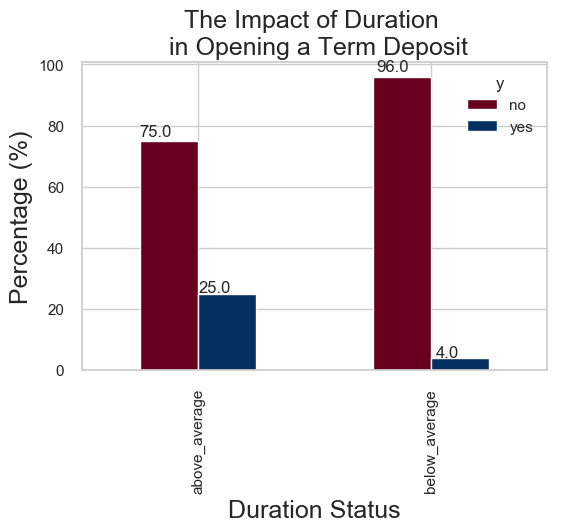

In [62]:
import seaborn as sns

sns.set(rc={'figure.figsize':(6,4)})
sns.set_style('whitegrid')
avg_duration = data['duration'].mean()

lst = [data]
data["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(data['duration_status'], data['y']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    

plt.show()

### Analysing the Cost Incurred

In [69]:
print ("No. of Call \t Conversion Efficiency")
eff_dict = {}
for i in range(1,25):
    eff = data.loc[(data['campaign']==i) & (data['y']=='yes')].count()['campaign']/ float(data[data['campaign'] >= i].shape[0])
    print ((str((i))+" \t\t "+str(eff)))
    eff_dict[i] = eff

No. of Call 	 Conversion Efficiency
1 		 0.05584150723511702
2 		 0.05143124097511254
3 		 0.04423551171393342
4 		 0.03261296660117878
5 		 0.024077046548956663
6 		 0.022156573116691284
7 		 0.015793848711554447
8 		 0.009566685424873381
9 		 0.012345679012345678
10 		 0.010968921389396709
11 		 0.01380897583429229
12 		 0.004335260115606936
13 		 0.007054673721340388
14 		 0.002105263157894737
15 		 0.0049261083743842365
16 		 0.0
17 		 0.013157894736842105
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.008620689655172414
24 		 0.0


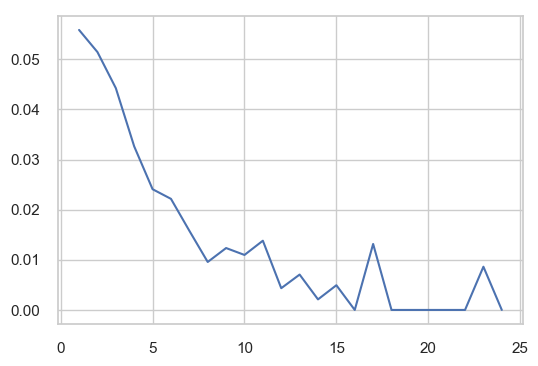

In [72]:
import matplotlib.pylab as pyl
lists = sorted(eff_dict.items())
x, y = zip(*lists)
pyl.plot(x, y)
pyl.show()

### Conclusion

#### We see from the graph that after 7th call, the conversion ratio is less than 1% which by far is just cost incurring with low returns.
#### It signifies that the customer might not be interested at all in the present. Rather, too many times might result in incurring too much cost on the company and even leaving a sour taste for the customer as well. 

#### So, we can say that maximum 7 calls can give positive result,beyond that its just loss of time and money.

In [78]:
total_campaign = (data['campaign']).sum()
extra_calls = (data[data['campaign']>7]['campaign']).sum() - 7*data[data['campaign']>7].shape[0]
print("Total Campaigns done: ",total_campaign)
print("Extra Calls done: ", extra_calls)

Total Campaigns done:  105754
Extra Calls done:  9634


##### Market Profit garnered

In [80]:
reduction_in_campaigns = 100*extra_calls/total_campaign
print(reduction_in_campaigns)

9.109820905119427


##### Based on the above results, we calculate the percentage sales amount that can still be retained

In [83]:
total_sales=float(data[data['y']=='yes'].shape[0])
less_costly_sales=float(data[(data['campaign'] <= 7) & (data['y']=='yes')].shape[0])
sales_percent=100*less_costly_sales/total_sales
print("Perecentage of sales retention: ", sales_percent)

Perecentage of sales retention:  98.42672413793103


## Results

#### Following this criteria of not doing more than 7 campaigns, Marketing cost can be reduced by 9.1% while retaining sales upto 98.426%